In [279]:
#access token vfrom NOAA
Token = 'PiAOWZKyvoDsXuUQNPlniGhxqexmLpVD'

#Long Beach Airport station
station_id = 'GHCND:USW00094789'

#For web requests
import requests

#To save the data
import pandas as pd

#convert the response to json
import json

#Numerical manipulation
import numpy as np

#parse the datetimes 
from datetime import datetime

#For ploting graphs and charts
from matplotlib import pyplot

import math

In [391]:
#initialize lists to store data
t_date = []
temperatures = []

#from year 2015-2019 ...
for year in range(2015, 2019):
    year = str(year)
    
    #make the api call
    req = requests.get('https://www.ncdc.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&datatypeid=TAVG&limit=1000&stationid=GHCND:USW00094789&startdate='+year+'-01-01&enddate='+year+'-12-31', headers={'token':Token})
    #load the api response as a json
    data = json.loads(req.text)
    #get all items in the response which are average temperature readings
    average_temps = [item for item in data['results'] if item['datatype']=='TAVG']
    #get the date field from all average temperature readings
    t_date += [item['date'] for item in average_temps]
    #get the actual average temperature from all average temperature readings
    temperatures += [item['value'] for item in average_temps]

#initialize dataframe
df_weather = pd.DataFrame()

#populate date and average temperature fields (cast string date to datetime and convert temperature from tenths of Celsius to Fahrenheit)
df_weather['date'] = [datetime.strptime(d, "%Y-%m-%dT%H:%M:%S") for d in t_date]
df_weather['temp_avg'] = [float(v)/10.0*1.8 + 32 for v in temps]

df_weather


,date,temp_avg
0,2015-01-01,32.54
1,2015-01-02,39.38
2,2015-01-03,36.50
3,2015-01-04,47.30
4,2015-01-05,42.98
...,...,...
1456,2018-12-27,39.92
1457,2018-12-28,46.40
1458,2018-12-29,50.36
1459,2018-12-30,37.40


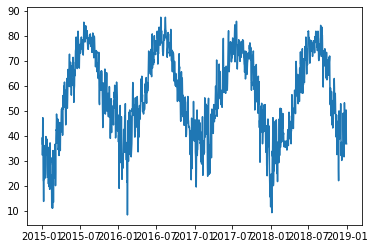

In [326]:
pyplot.plot(df_weather['date'], df_weather['temp_avg'])
pyplot.show()

In [367]:
#This function takes 5 args 
#target_year = x, 
#small_year = x1, 
#big_year = x2, 
#small_temp = y1, 
#big_temp = y2
# Returns the target year y
def linear_interpolation(x, x1, x2, y1, y2):
    y = 0
    y = y1 + (((y2 - y1)/(x2 - x1)) * (x - x1))
    return y

#This function takes 1 arg to check for the year, or month
def date_equality_checker(index):
    if (((x[index].year)!=(x[index - 1].year)) and ((x[index].year)!=(x[index - 1].year))):
        return 1
    elif (((x[index].month)!=(x[index - 1].month)) and ((x[index].month)!=(x[index - 1].month))):
        return 2
    else:
        return 3

In [369]:
# Set the dataFrame into X and Y axis
y = df_weather['temp_avg']
x = df_weather['date']

y.head()

0      NaN
1    39.38
2    36.50
3      NaN
4    42.98
Name: temp_avg, dtype: float64

In [371]:
## To set the some y values to NaN
# for index in range(0, y.size, 3):
#     y[index] = np.nan



In [372]:
y.head(y.size)

0         NaN
1       39.38
2       36.50
3         NaN
4       42.98
        ...  
1456    39.92
1457    46.40
1458      NaN
1459    37.40
1460    36.86
Name: temp_avg, Length: 1461, dtype: float64

In [386]:
print("DATE               ||  AVG_TEMP")
print("""============================
""")
for index in range(1, y.size):
    if np.isnan(y[index]):
        if index == 0:
            Print("index is 0") #Edge Case that needs to be handle (Extrapolate)
        elif index == y.size:
            print ("It is the last index") #Edge Case that needs to be handle (Extrapolate)
        else:
            date_equality = date_equality_checker(index) #Interxpolate
            if date_equality == 3:
                print(f"{x[index]} - {round(linear_interpolation(x=x[index].day, x1=x[index-1].day, x2=x[index+1].day, y1=y[index-1], y2=y[index+1]),2)}")
            elif date_equality == 2:
                print(f"{x[index]} - {round(linear_interpolation(x=x[index].month, x1=x[index-1].month, x2=x[index+1].month, y1=y[index-1], y2=y[index+1]),2)}")
            else:
                print(f"{x[index]} - {round(linear_interpolation(x=x[index].year, x1=x[index-1].year, x2=x[index+1].year, y1=y[index-1], y2=y[index+1]),2)}")
            
            
            

DATE               ||  AVG_TEMP

2015-01-04 00:00:00 - 39.74
2015-01-07 00:00:00 - 17.96
2015-01-10 00:00:00 - 25.88
2015-01-13 00:00:00 - 30.29
2015-01-16 00:00:00 - 27.05
2015-01-19 00:00:00 - 37.58
2015-01-22 00:00:00 - 32.81
2015-01-25 00:00:00 - 31.91
2015-01-28 00:00:00 - 25.07
2015-01-31 00:00:00 - 35.7
2015-02-03 00:00:00 - 31.19
2015-02-06 00:00:00 - 31.28
2015-02-09 00:00:00 - 33.53
2015-02-12 00:00:00 - 24.26
2015-02-15 00:00:00 - 17.78
2015-02-18 00:00:00 - 21.29
2015-02-21 00:00:00 - 22.64
2015-02-24 00:00:00 - 28.67
2015-02-27 00:00:00 - 25.52
2015-03-02 00:00:00 - 27.32
2015-03-05 00:00:00 - 28.4
2015-03-08 00:00:00 - 33.98
2015-03-11 00:00:00 - 44.51
2015-03-14 00:00:00 - 41.09
2015-03-17 00:00:00 - 38.03
2015-03-20 00:00:00 - 34.52
2015-03-23 00:00:00 - 37.49
2015-03-26 00:00:00 - 41.36
2015-03-29 00:00:00 - 40.37
2015-04-01 00:00:00 - 46.22
2015-04-04 00:00:00 - 50.0
2015-04-07 00:00:00 - 47.12
2015-04-10 00:00:00 - 48.2
2015-04-13 00:00:00 - 53.24
2015-04-16 00:00:00